# Customer Segmentation

# Problem Statement
>We want to understand the association between age, spending score and annual income to find any pattern that could be used by the marketing team to plan their stratergy accordingly to easily converge target customers.


### Importing Libraries

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #Install this library for visualizing 3D plots using 'pip install plotly'.

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%matplotlib inline

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Reading Data in Our Notebook

In [9]:
df = pd.read_csv('Data.csv')
df.head()

Gender  Age  Spending Score (1-100)  Annual Income (k)
0    Male   19                      39                300
1    Male   21                      81                300
2  Female   20                       6                312
3  Female   23                      77                312
4  Female   31                      40                324

## Factors / Parameters


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Spending Score (1-100)  200 non-null    int64 
 3   Annual Income (k)       200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


>From above descriptive statistics we can say that we have following columns in our data with respective data type
 - **Gender (Str):** This attribute contains the gender of person.
 - **Age (int):** This attribute contains the age of person.
 - **Annual Income (In Thousands PKR) (int):** This attribute contains the income of individual in PKR and in thousands.
 - **Spending Score (1-100) (int):** This attribute contains the self judged estimated score that person spents on shopping indicating his/her shopping habit.
 

In [11]:
df['Gender'] = pd.Categorical(df['Gender'])
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Where **Gender** is a categorical variable which contains two categories **Male** and **Female**.

In [12]:
df.isna().any()

Gender                    False
Age                       False
Spending Score (1-100)    False
Annual Income (k)         False
dtype: bool

## DA (Demographic Analysis)

In [16]:
def age_group(x):
    if x >= 15 and x <=35:
        return 'Adult/Young'
    elif x >=36 and x <= 55:
        return 'Middle-Age'
    else:
        return 'Senior Citizen'

In [17]:
df['Age Group'] = df['Age'].apply(age_group)

In [19]:
pd.pivot_table(df, values='Annual Income (k)', index='Gender', columns='Age Group', aggfunc='count')

Age Group  Adult/Young  Middle-Age  Senior Citizen
Gender                                            
Female              57          44              11
Male                41          29              18

## EDA (Exploratory Data Analysis)

There are **no NA values** in our dataframe.

In [13]:
df.shape

(200, 4)

We have **200 rows** and **5 columns** in our dataframe.

In [14]:
df.describe()

Age  Spending Score (1-100)  Annual Income (k)
count  200.000000              200.000000         200.000000
mean    38.850000               50.200000         846.720000
std     13.969007               25.823522         315.176654
min     18.000000                1.000000         300.000000
25%     28.750000               34.750000         618.000000
50%     36.000000               50.000000         858.000000
75%     49.000000               73.000000        1056.000000
max     70.000000               99.000000        1764.000000

In [15]:
df.describe(include=['category'])

Gender
count      200
unique       2
top     Female
freq       112

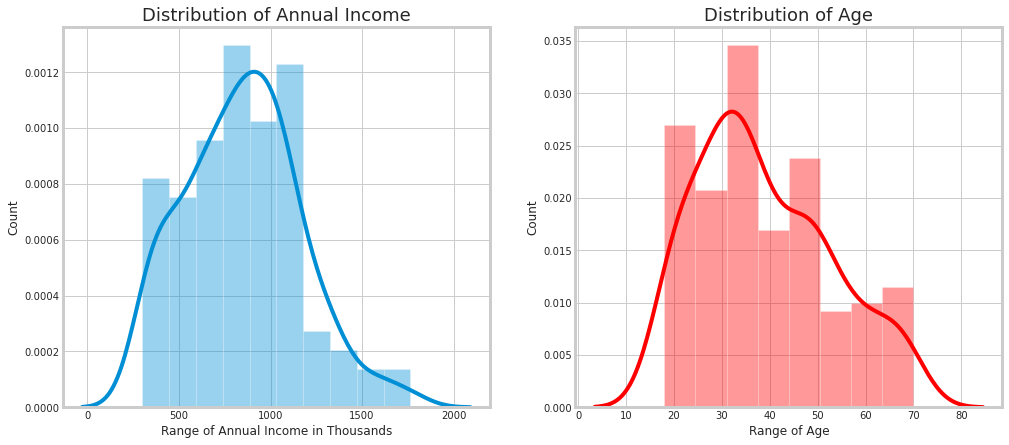

In [12]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(df['Annual Income (k)'])
plt.title('Distribution of Annual Income', fontsize = 18)
plt.xlabel('Range of Annual Income in Thousands')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 18)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> **Distribution of Annual Income**
>> From above plot we can see that most of the customers in our data have annual income of around 300,000 PKR to 1,764,000 PKR. We can also say that the highest annual income in our data is around 1,764,000 PKR, where as the lowest annual income in our data is around 300,000 PKR.

> **Distribution of Age**
>> From above plot we can see that most of the customers in our data are of age between 18 and 50. Where senior citizens are less likely to go for shopping and youngsters are also less likely to visit mall as compared to middle aged people.

Text(0, 0.5, 'Count')

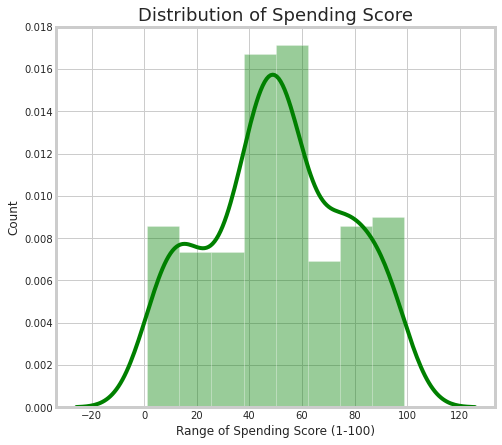

In [13]:
plt.rcParams['figure.figsize'] = (7, 7)


sns.distplot(df['Spending Score (1-100)'], color='green')
plt.title('Distribution of Spending Score', fontsize = 18)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

> **Distribution of Spending Score**
>> From above distribution we can say that most of the spending score lies between 40 and 60. With maximum spending score of 99 and minimum spending score of 1.

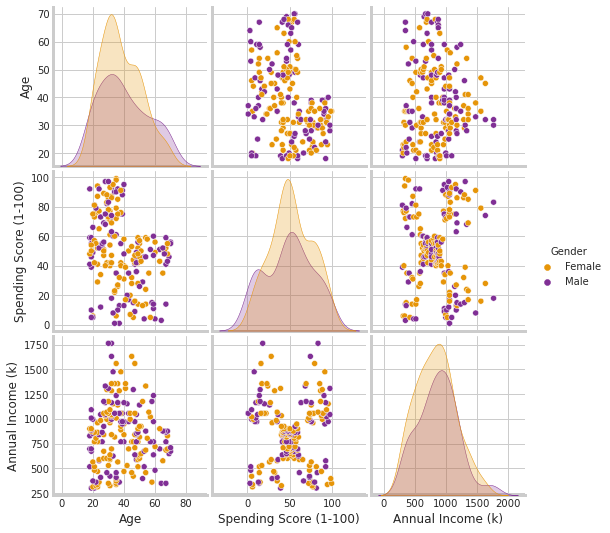

In [14]:
sns.pairplot(df, hue='Gender', palette='CMRmap_r')
plt.show()

**Above scatter plot suggest that we can see some clustering between Annual Income with Spending Score.**

We have also plotted individual scatter plot to explore the clusters.

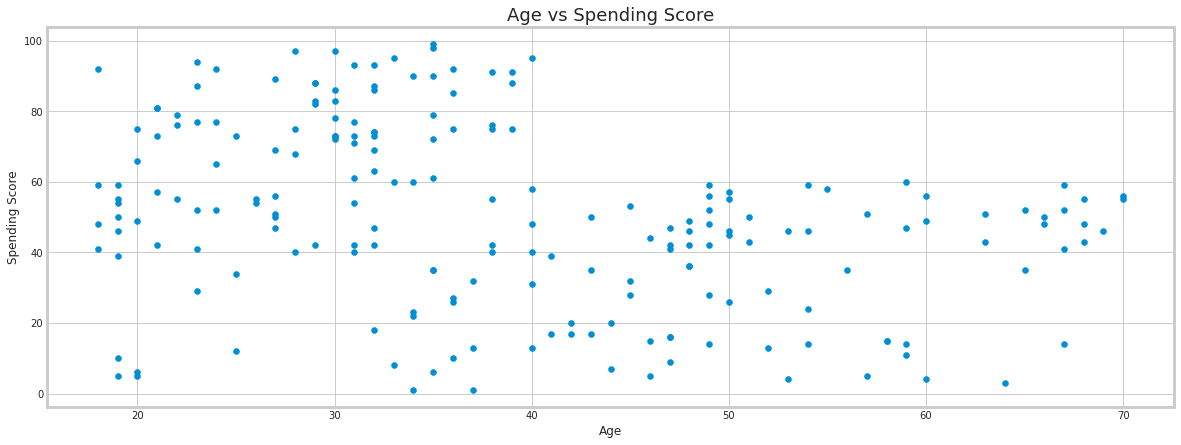

In [15]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.scatter(x=df['Age'], y=df['Spending Score (1-100)'])
plt.title("Age vs Spending Score", fontsize = 18)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

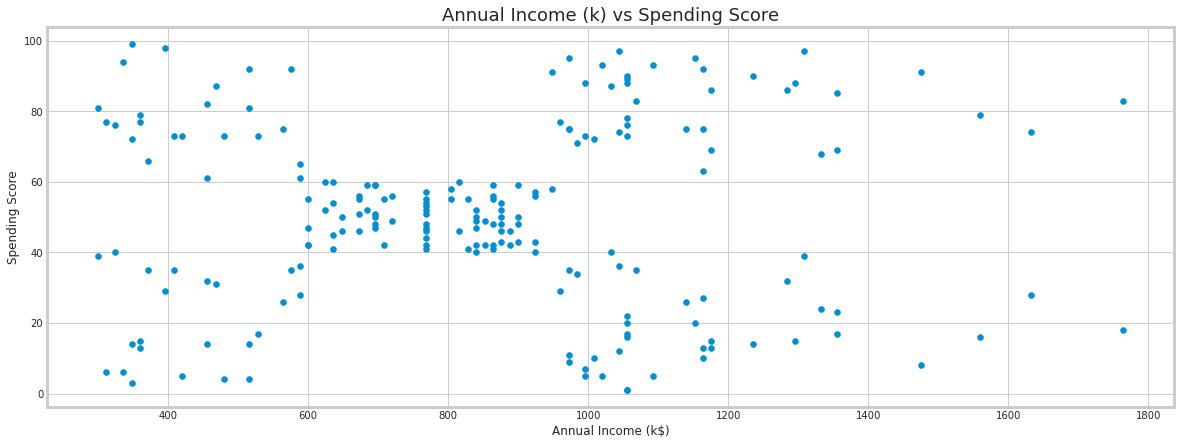

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.scatter(x=df['Annual Income (k)'], y=df['Spending Score (1-100)'])
plt.title("Annual Income (k) vs Spending Score", fontsize = 18)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

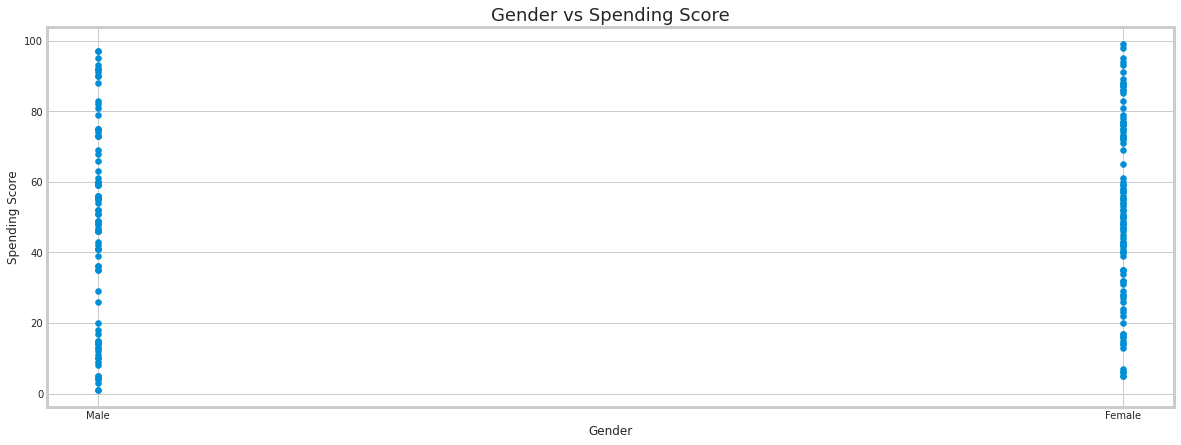

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.scatter(x=df['Gender'], y=df["Spending Score (1-100)"])
plt.title("Gender vs Spending Score", fontsize = 18)
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.show()

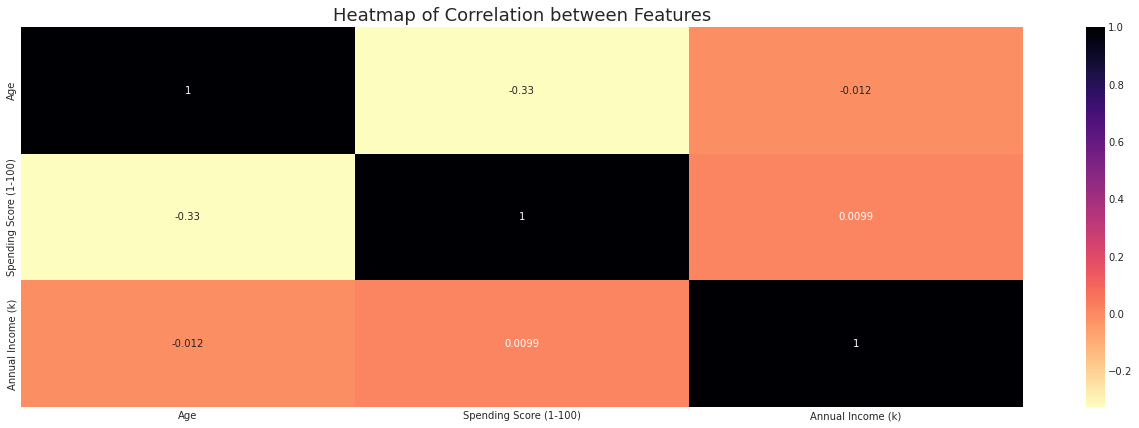

In [18]:
plt.rcParams['figure.figsize'] = (20, 7)

sns.heatmap(df.corr(), annot=True, cmap='magma_r')
plt.title("Heatmap of Correlation between Features", fontsize=18)
plt.show()

**The above heatmap of correlation suggests that there arent any strong correlation between features.**

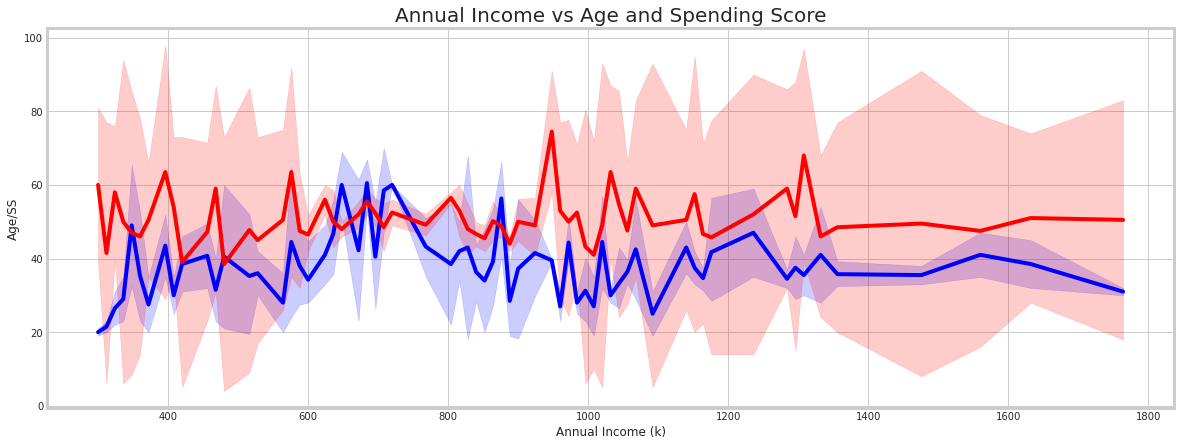

In [19]:
plt.rcParams['figure.figsize'] = (18, 7)

x = df['Annual Income (k)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'red')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.ylabel('Age/SS')
plt.show()

**We have plotted a line graph to explore the trend betwwen the Age and Spending Score with respect to Annual Income and see there is a trend between Age and Spending Score.**

# K-Means Clustering

Using features: Annual Income (k$) and Spending Score (1-100) to create clusters.

In [20]:
X = df[['Annual Income (k)', 'Spending Score (1-100)']].values 

**As K-Means use Euclidean Distance, we need to standerdize the features to avoid dominance of one feature on other.**

In [21]:
scaler = StandardScaler().fit(X)
x = scaler.transform(X)

In [22]:
%%capture --no-display
inertia = [] #To store inertia (within-cluster sum-of-squares)/ error from different n clusters.

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0).fit(x)
    #km.fit(x)
    
    inertia.append(km.inertia_)

In [23]:
inertia

[400.0,
 269.01679374906655,
 157.70400815035947,
 108.92131661364358,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.18175782682131,
 32.37525368158286,
 29.07617685124427]

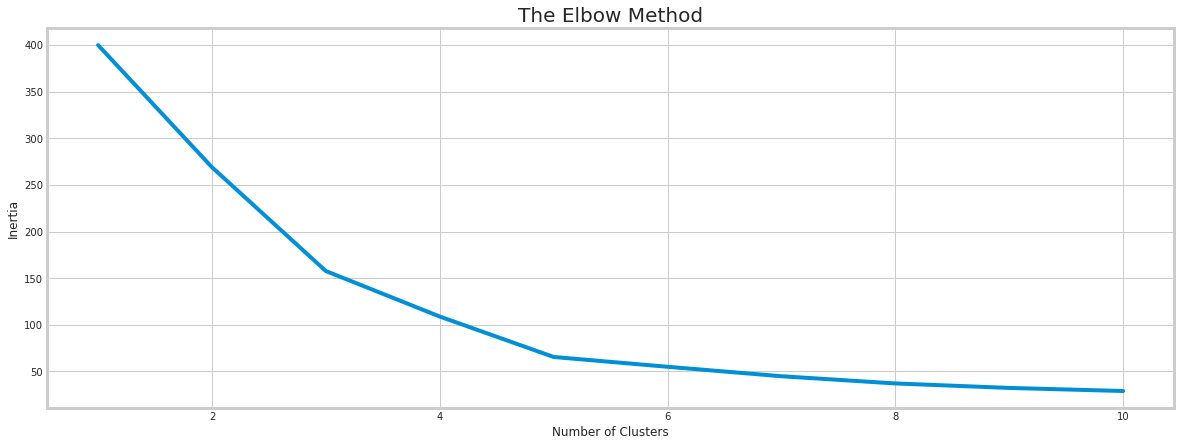

In [24]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(range(1,11), inertia)

plt.title("The Elbow Method", fontsize=20)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.show()

>**The Elbow Method**
>> In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use

**We can see that Elbow of Cluster lies at 5 where error within number of clusters is 65.56**

In [25]:
%%capture --no-display
km = KMeans(n_clusters=5, random_state=0)
km.fit(x)
y_means = km.predict(x)

In [26]:
km.inertia_

65.56840815571681

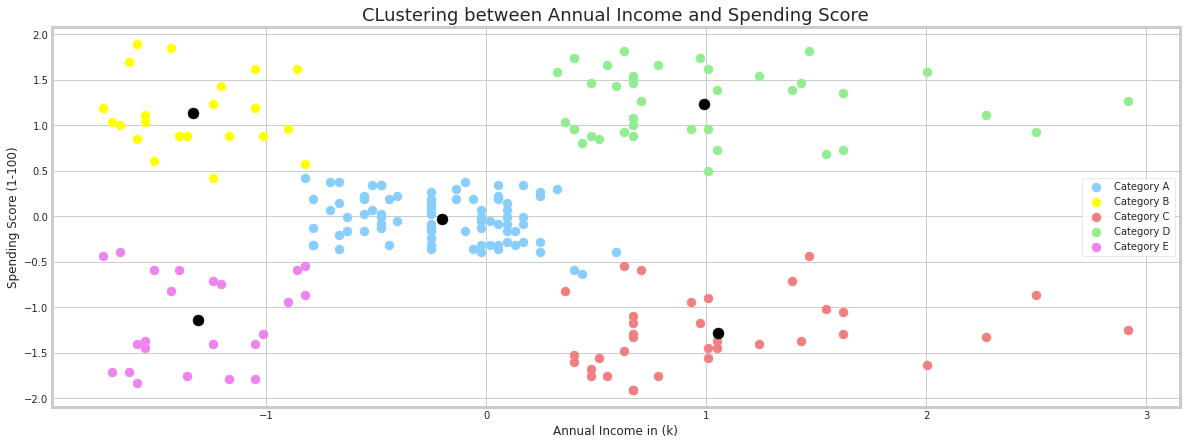

In [27]:
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], c = 'lightskyblue', s = 80, label = 'Category A')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], c = 'yellow', s = 80, label = 'Category B')
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], c = 'lightcoral', s = 80, label = 'Category C')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], c = 'lightgreen', s = 80, label = 'Category D')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], c = 'violet', s = 80, label = 'Category E')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'black', s =120)

plt.title('CLustering between Annual Income and Spending Score', fontsize = 18)
plt.xlabel('Annual Income in (k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From above clustering analysis, we can say that there are 5 categories of customer in our data i.e
 - A person who makes little and spends a lot is reckless: **Category A**
 - A person who makes little and spends little is thrifty: **Category B**
 - A person who makes the average and spends the average is normal: **Category C**
 - A person who makes a lot and spends a lot is a high roller: **Category D**
 - A person who makes a lot and spends little is a miser: **Category E**

Using features: Age and Spending Score (1-100) to create clusters.

In [28]:
X = df[['Age', 'Spending Score (1-100)']].values

**As K-Means use Euclidean Distance, we need to standerdize the features to avoid dominance of one feature on other.**

In [29]:
scaler = StandardScaler().fit(X)
x = scaler.transform(X)

In [30]:
%%capture --no-display
inertia = [] #To store inertia (within-cluster sum-of-squares)/ error from different n clusters.

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x)
    
    inertia.append(km.inertia_)

In [31]:
inertia

[400.00000000000006,
 189.3874903399243,
 124.32628617921526,
 89.76521676586151,
 71.09364141459415,
 53.128438356294,
 45.903798612012054,
 39.39545917716783,
 33.86021150658475,
 28.800849469273647]

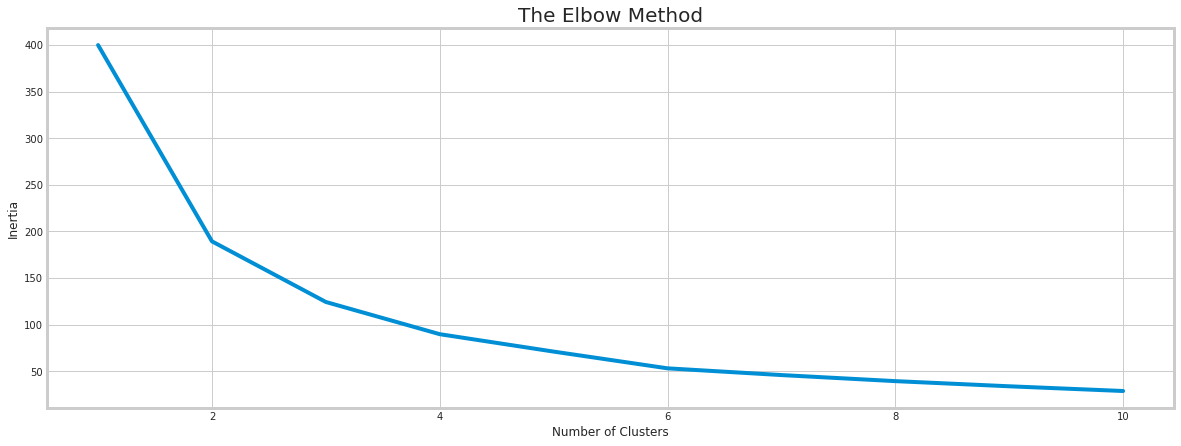

In [32]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(range(1,11), inertia)

plt.title("The Elbow Method", fontsize=20)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.show()

We can see that Elbow of Cluster lies at 4 but we will use 5, the reason is that if we found any clusters then we can merge both feature to create cluster model that best describes our data. when k=5, inertia is 71.09

In [33]:
%%capture --no-display
km = KMeans(n_clusters=5, random_state=0)
km.fit(x)
y_means = km.predict(x)

In [34]:
km.inertia_

71.09364141459415

In [35]:
km.cluster_centers_

array([[ 1.03507139, -1.41769281],
       [-0.62254456,  1.24814723],
       [-0.23063204, -1.14182445],
       [ 1.22927178, -0.06558366],
       [-0.91344993,  0.01969484]])

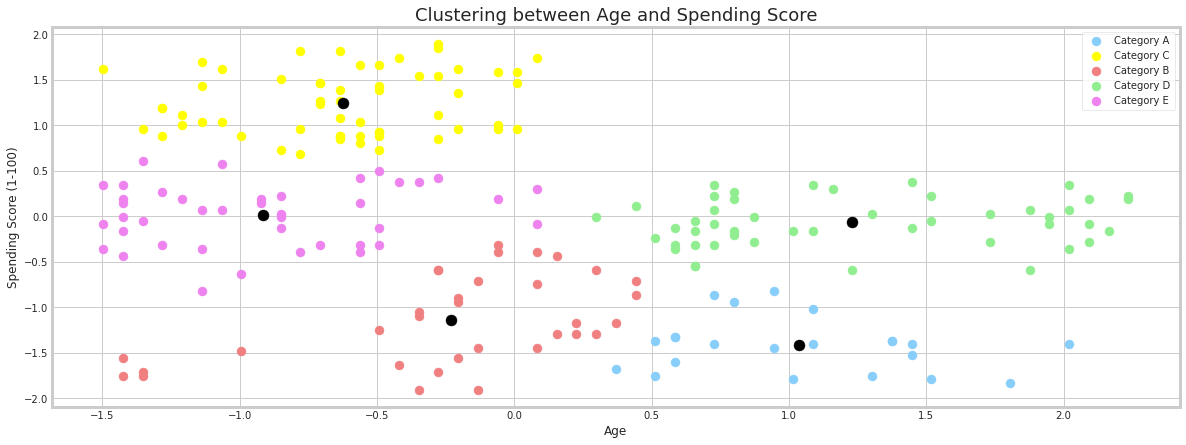

In [36]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], c = 'lightskyblue', s = 80, label = 'Category A')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], c = 'yellow', s = 80, label = 'Category C')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], c = 'lightcoral', s = 80, label = 'Category B')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], c = 'lightgreen', s = 80, label = 'Category D')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], c = 'violet', s = 80, label = 'Category E')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'black', s =120)


plt.title('Clustering between Age and Spending Score', fontsize = 18)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From above clustering analysis, we can say that there are 5 categories of customer in our data i.e
 - A person who is senior citizen and spends less: **Category A**
 - A person who is senior citizen and spends average: **Category B**
 - A person who is young and spends the average: **Category C**
 - A person is young and spends a lot: **Category D**
 - A person is young and middle-aged and spends little: **Category E**

Using features: Age, Annual Income and Spending Score (1-100) to create clusters.

In [37]:
X = df[['Age', 'Annual Income (k)', 'Spending Score (1-100)']].values

**As K-Means use Euclidean Distance, we need to standerdize the features to avoid dominance of one feature on other.**

In [38]:
scaler = StandardScaler().fit(X)
x = scaler.transform(X)

In [39]:
%%capture --no-display
inertia = [] #To store inertia (within-cluster sum-of-squares)/ error from different n clusters.

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x)
    
    inertia.append(km.inertia_)

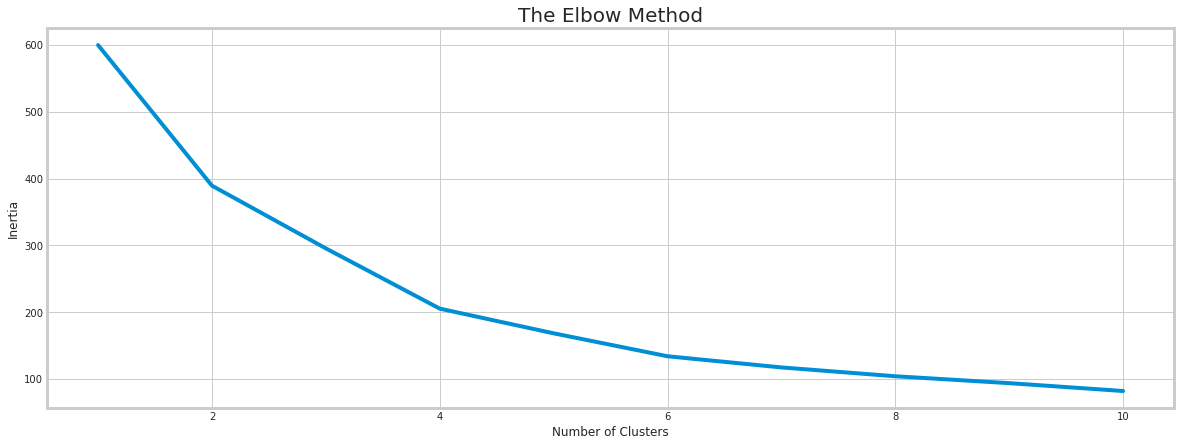

In [40]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(range(1,11), inertia)

plt.title("The Elbow Method", fontsize=20)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.show()

In [41]:
%%capture --no-display
km = KMeans(n_clusters=5, random_state=0)
km.fit(x)
y_means = km.predict(x)

In [42]:
km.inertia_

168.24758017556837

In [43]:
df['Clusters (K-Means)'] = y_means

In [44]:
def clusterLabel(x):
    
    """
    Replacing Cluster Index with Categories
    """
    
    
    if x == 0:
        return 'A'
    elif x == 1:
        return 'B'
    elif x == 2:
        return 'C'
    elif x == 3:
        return 'D'
    else:
        return 'E'
    

df['Clusters (K-Means)'] = df['Clusters (K-Means)'].apply(clusterLabel)

In [45]:
df.head()

Gender  Age  Spending Score (1-100)  Annual Income (k) Clusters (K-Means)
0    Male   19                      39                300                  C
1    Male   21                      81                300                  C
2  Female   20                       6                312                  D
3  Female   23                      77                312                  C
4  Female   31                      40                324                  C

In [46]:
data = df[['Age', 'Annual Income (k)', 'Spending Score (1-100)', 'Clusters (K-Means)']]

fig = px.scatter_3d(data, x='Age', y='Annual Income (k)', z='Spending Score (1-100)', color='Clusters (K-Means)')
fig.show()

In [47]:
df.groupby('Clusters (K-Means)').describe()['Age']

count       mean        std   min    25%   50%    75%  \
Clusters (K-Means)                                                          
A                    39.0  39.871795  10.938054  19.0  34.00  41.0  47.00   
B                    47.0  55.638298   8.913657  40.0  49.00  54.0  65.00   
C                    54.0  25.185185   5.508395  18.0  21.00  24.0  30.00   
D                    20.0  46.250000  11.579815  20.0  36.75  47.0  53.25   
E                    40.0  32.875000   3.857643  27.0  30.00  32.0  36.00   

                     max  
Clusters (K-Means)        
A                   59.0  
B                   70.0  
C                   38.0  
D                   67.0  
E                   40.0

In [48]:
df.groupby('Clusters (K-Means)').describe()['Annual Income (k)']

count         mean         std    min     25%     50%  \
Clusters (K-Means)                                                          
A                    39.0  1153.230769  200.700151  888.0  1014.0  1056.0   
B                    47.0   772.595745  105.820122  576.0   690.0   768.0   
C                    54.0   613.111111  201.787359  300.0   429.0   600.0   
D                    20.0   441.000000   87.740047  312.0   360.0   438.0   
E                    40.0  1153.200000  196.068434  948.0  1017.0  1062.0   

                       75%     max  
Clusters (K-Means)                  
A                   1260.0  1764.0  
B                    864.0  1068.0  
C                    813.0   924.0  
D                    516.0   588.0  
E                   1248.0  1764.0

In [49]:
df.groupby('Clusters (K-Means)').describe()['Spending Score (1-100)']

count       mean        std   min   25%   50%   75%   max
Clusters (K-Means)                                                           
A                    39.0  19.358974  11.610991   1.0  10.5  17.0  27.5  42.0
B                    47.0  48.851064   6.303825  35.0  44.5  48.0  54.0  60.0
C                    54.0  62.240741  16.596130  39.0  50.0  58.0  74.5  99.0
D                    20.0  18.350000  11.935242   3.0   6.0  14.5  29.5  36.0
E                    40.0  81.525000   9.999968  58.0  74.0  83.0  90.0  97.0

## Conclusion

> We can conclude that there are 5 categories in our data i.e:

>> **Category A:** Having average of spending score 19.35, between 1 and 42. Age lies between 19 and 47, average around 40. Annual Income lies between 64 Thousand USD and 95 Thousand USD, average between 86 Thousand USD. **Preferably not to be targeted.**

>> **Category B:** Having average of spending score 62.24, between 39 and 99. Age lies between 18 and 38, average around 25. Annual Income lies between 15 Thousand USD and 67 Thousand USD, average between 41 Thousand USD. **Preferably to be targeted.**

>> **Category C:** Having average of spending score 48.85, between 1 and 27.5. Age lies between 40 and 70, average around 55. Annual Income lies between 38 Thousand USD and 79 Thousand USD, average between 54 Thousand USD. **Preferably to be targeted.**

>> **Category D:** Having average of spending score 81, between 58 and 97. Age lies between 27 and 40, average around 32. Annual Income lies between 69 Thousand USD and 137 Thousand USD, average between 86 Thousand USD. **Preferably to be targeted.**

>> **Category E:** Having average of spending score 18, between 3 and 36. Age lies between 20 and 67, average around 46. Annual Income lies between 16 Thousand USD and 39 Thousand USD, average between 26.7 Thousand USD. **Preferably not to be targeted.**